# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

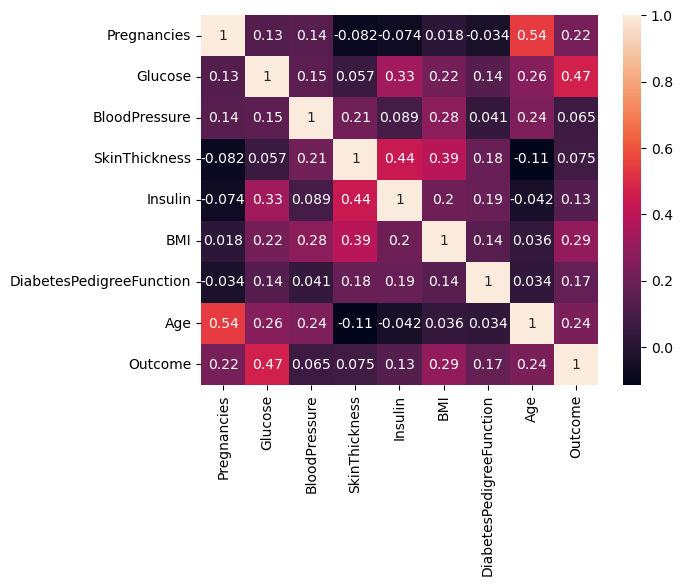

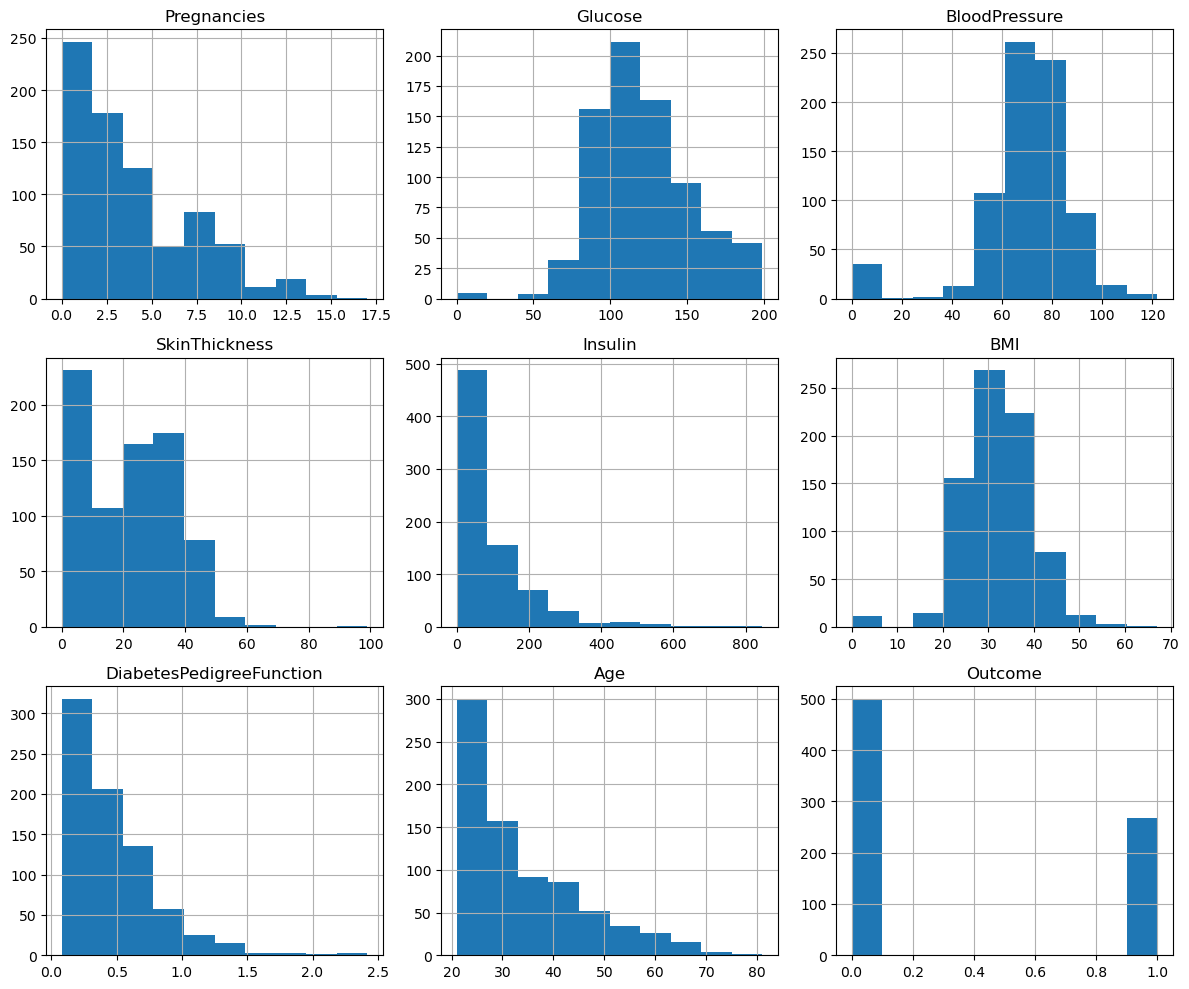

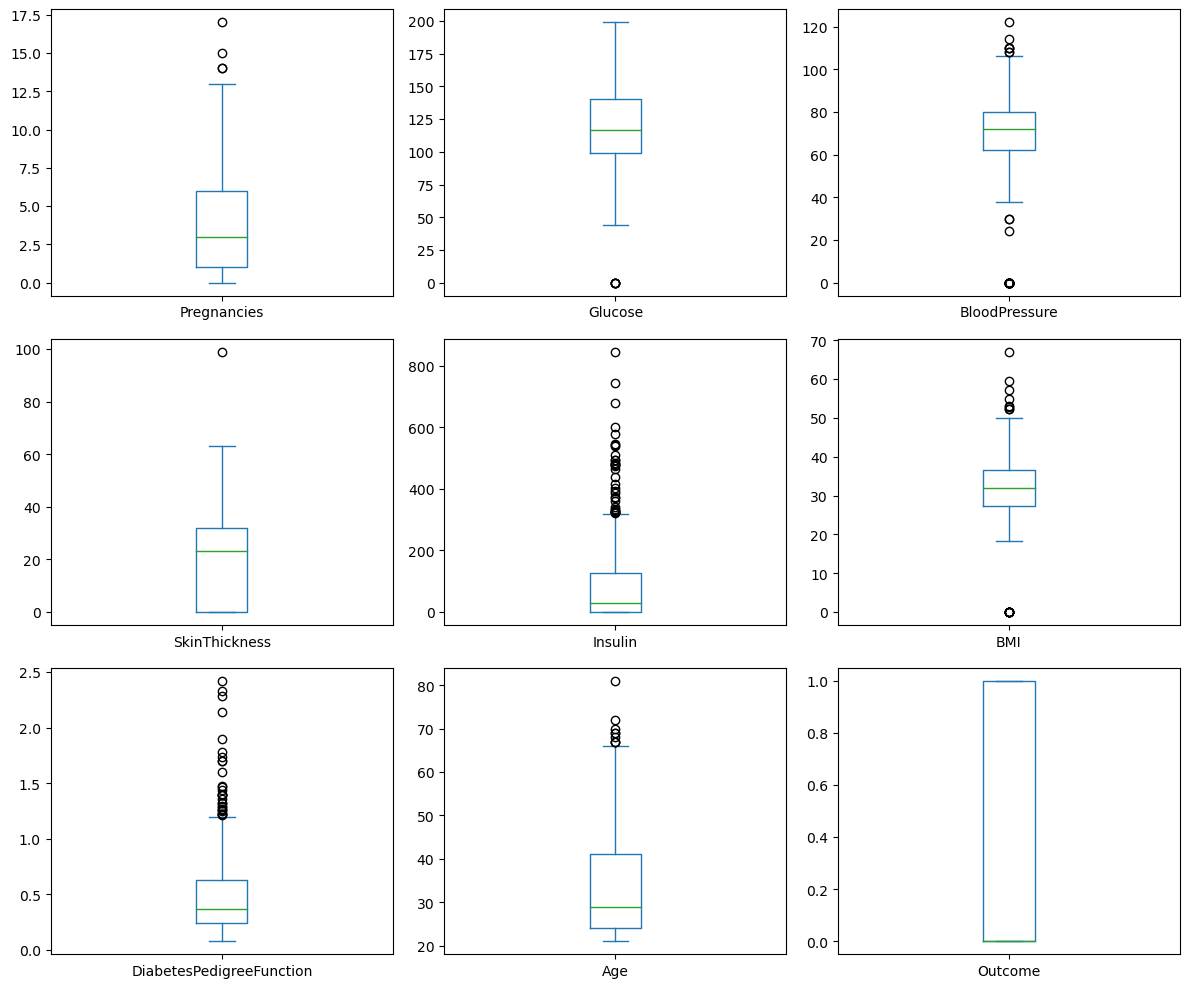

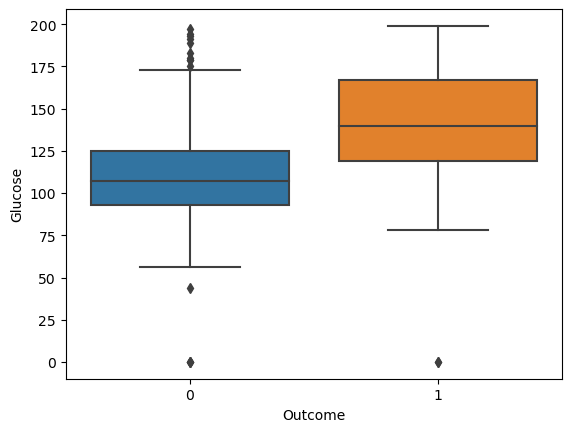

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = pd.read_csv("C:/Users/17789/LHL/ml-project-supervised-learning/diabetes.csv")

# Check for missing values
missing_values = diabetes_data.isnull().sum()

# Summary statistics
summary_stats = diabetes_data.describe()

# Check for zeros in columns where it doesn't make sense (like 'Glucose', 'BloodPressure', etc.)
zero_values = (diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

# Correlation matrix
correlation_matrix = diabetes_data.corr()

# Heatmap for correlation
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Histograms for each predictor variable
diabetes_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots for each predictor variable
diabetes_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,10))
plt.tight_layout()
plt.show()

average_age = diabetes_data['Age'].mean()

average_glucose_diabetes = diabetes_data.groupby('Outcome')['Glucose'].mean()

average_bmi_diabetes = diabetes_data.groupby('Outcome')['BMI'].mean()

# Comparison of distributions for diabetic and non-diabetic individuals
# Example: Glucose levels
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data)
plt.show()


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [18]:
# 1. Handling Missing Values -> Replace zeros with NaN in columns where zero is not a valid value
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_with_zeros] = diabetes_data[columns_with_zeros].replace(0, np.nan)

# 2. Handling Outliers -> Impute missing values using the median for each column
for col in columns_with_zeros:
    diabetes_data[col].fillna(diabetes_data[col].median(), inplace=True)

Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

# Define an outlier as being outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outliers = (diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))

# 3. Scaling and Normalization
# Option to remove outliers - this will delete any row with outliers
# diabetes_data = diabetes_data[~((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).any(axis=1)]
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Scale the features
diabetes_data_scaled = pd.DataFrame(scaler.fit_transform(diabetes_data.drop('Outcome', axis=1)), columns=diabetes_data.columns[:-1])

# Add the Outcome column back
diabetes_data_scaled['Outcome'] = diabetes_data['Outcome']

# 4. Feature Engineering and 5. Handling Imbalanced Data
diabetes_data['Insulin_to_Glucose_Ratio'] = diabetes_data['Insulin'] / diabetes_data['Glucose']

from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Balance the dataset
X_smote, y_smote = smote.fit_resample(diabetes_data_scaled.drop('Outcome', axis=1), diabetes_data_scaled['Outcome'])

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'diabetes_data_scaled' is your processed dataset and 'Outcome' is the target variable
X = diabetes_data_scaled.drop('Outcome', axis=1)
y = diabetes_data_scaled['Outcome']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to compute the metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}

# Evaluate the models
logistic_evaluation = evaluate_model(logistic_model, X_test, y_test)
random_forest_evaluation = evaluate_model(random_forest_model, X_test, y_test)

# Compare the model performances
print("Logistic Regression Performance: ", logistic_evaluation)
print("Random Forest Performance: ", random_forest_evaluation)

from sklearn.model_selection import GridSearchCV

# Example of tuning the Random Forest model
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(random_forest_model, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_


Logistic Regression Performance:  {'accuracy': 0.7532467532467533, 'precision': 0.6666666666666666, 'recall': 0.6181818181818182, 'f1': 0.6415094339622642, 'roc_auc': 0.8229568411386594}
Random Forest Performance:  {'accuracy': 0.7402597402597403, 'precision': 0.631578947368421, 'recall': 0.6545454545454545, 'f1': 0.6428571428571428, 'roc_auc': 0.833425160697888}


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = diabetes_data_scaled.drop('Outcome', axis=1)
y = diabetes_data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression and Random Forest models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    }

logistic_evaluation = evaluate_model(logistic_model, X_test, y_test)
random_forest_evaluation = evaluate_model(random_forest_model, X_test, y_test)

(logistic_evaluation, random_forest_evaluation)


({'accuracy': 0.7532467532467533,
  'precision': 0.6666666666666666,
  'recall': 0.6181818181818182,
  'f1': 0.6415094339622642,
  'roc_auc': 0.8229568411386594},
 {'accuracy': 0.7402597402597403,
  'precision': 0.631578947368421,
  'recall': 0.6545454545454545,
  'f1': 0.6428571428571428,
  'roc_auc': 0.833425160697888})